In [33]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

In [72]:
FONT_SIZE = 14
FONT_SIZE_2 = 18
FONT_SIZE_3 = 24
plt.rcParams.update({'font.size': FONT_SIZE})

In [34]:
PALLETTE = {
    'blue': '#064473',
    'orange': '#D95F02',
    'green': '#009E73',
    'red': '#C00000',
    'purple': '#E69F00',
    'brown': '#A6761D',
    'pink': '#F0E442',
    'grey': '#999999'
}

In [35]:
df_churn_dataset = pd.read_csv('../data/churn_dataset.csv')

In [36]:
df_churn_dataset.head()

,customer_id,analysis_date,recency,purchase_frequency_1_yr,purchase_amount_1_yr,tenure,total_purchase_amount,returns_frequency_1_yr,returned_amount_1_yr,is_churn
0,1,2021-01-01,253,1,349.552260,2189,1616.498520,0,0.0,0
1,1,2021-02-01,284,1,349.552260,2220,1616.498520,0,0.0,0
2,1,2021-03-01,312,1,349.552260,2248,1616.498520,0,0.0,0
3,1,2021-04-01,343,1,349.552260,2279,1616.498520,0,0.0,0
4,1,2021-09-01,3,1,464.269813,2432,2080.768333,0,0.0,0


In [37]:
df_churn_dataset.analysis_date.unique()

array(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
       '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
       '2023-01-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01'], dtype=object)

### 1. Visualizing the relationship between each feature and churn

#### For visualizing the relationship we first focus on a single analysis date

In [38]:
df_churn_subset = df_churn_dataset[df_churn_dataset['analysis_date'] == '2021-01-01']

#### 1.1. relationship between recency and churn

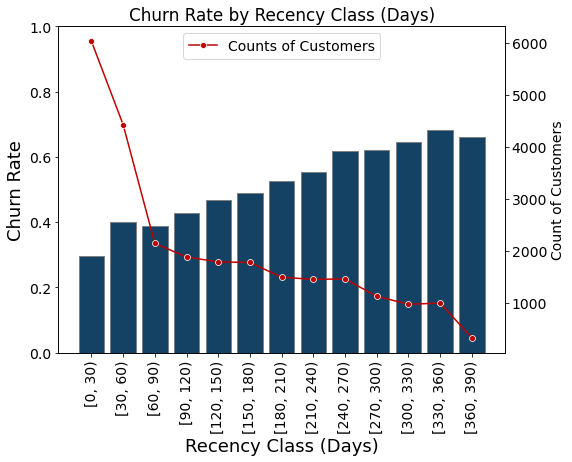

In [44]:
# Filter the dataframe
df_recency = df_churn_subset.copy()

df_recency['recency_class'] = pd.cut(df_recency['recency'], bins=range(0, df_recency['recency'].max() + 30, 30), right=False)

df_recency_grouped = df_recency.groupby('recency_class').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='recency_class', y='churn_rate', data=df_recency_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Recency Class (Days)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Recency Class (Days)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_recency_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

#### 1.2. relationship between purchase frequency in the previous year and churn

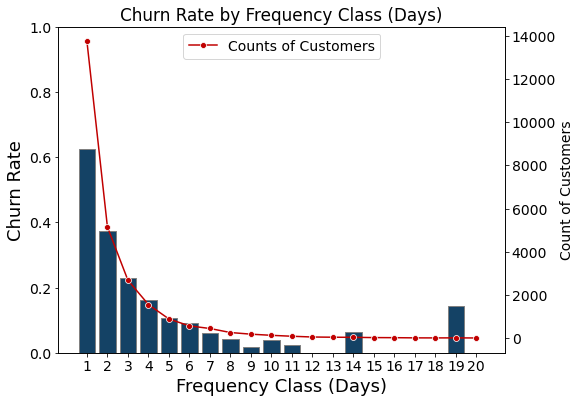

In [45]:
# Filter the dataframe
df_frequency = df_churn_subset[df_churn_subset['purchase_frequency_1_yr'] <= 20].copy()


df_frequency_grouped = df_frequency.groupby('purchase_frequency_1_yr').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='purchase_frequency_1_yr', y='churn_rate', data=df_frequency_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Frequency Class (Days)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Frequency Class (Days)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_frequency_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

#### 1.3. relationship between purchase amount in the previous year and churn

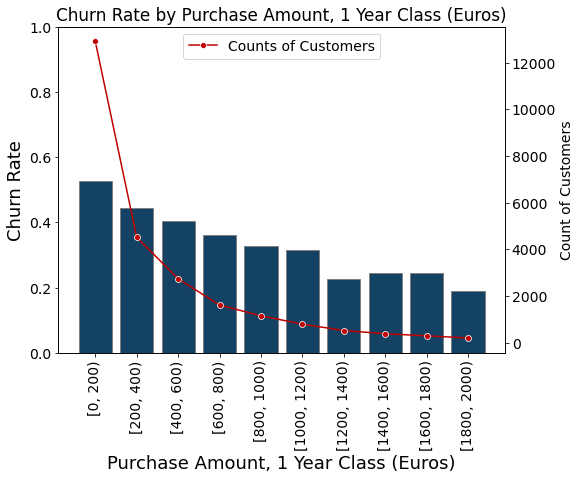

In [47]:
# Filter the dataframe
df_purchase_amount_1_yr = df_churn_subset[(df_churn_subset['purchase_amount_1_yr'] <= 2000) & (df_churn_subset['purchase_amount_1_yr'] > 0)].copy()

df_purchase_amount_1_yr['purchase_amount_1_yr_class'] = pd.cut(df_purchase_amount_1_yr['purchase_amount_1_yr'], bins=range(0, df_purchase_amount_1_yr['purchase_amount_1_yr'].astype('int').max() + 200, 200), right=False)


df_purchase_amount_1_yr_grouped = df_purchase_amount_1_yr.groupby('purchase_amount_1_yr_class').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='purchase_amount_1_yr_class', y='churn_rate', data=df_purchase_amount_1_yr_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Purchase Amount, 1 Year Class (Euros)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Purchase Amount, 1 Year Class (Euros)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_purchase_amount_1_yr_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

#### 1.4. relationship between customer tenure and churn

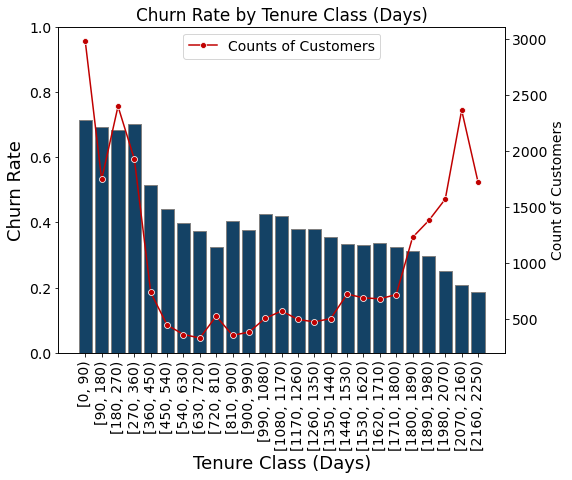

In [48]:
# Filter the dataframe
df_tenure = df_churn_subset.copy()

df_tenure['tenure_class'] = pd.cut(df_tenure['tenure'], bins=range(0, df_tenure['tenure'].max() + 90, 90), right=False)

df_tenure_grouped = df_tenure.groupby('tenure_class').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='tenure_class', y='churn_rate', data=df_tenure_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Tenure Class (Days)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Tenure Class (Days)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_tenure_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

#### 1.5. relationship between total purchase amount and churn

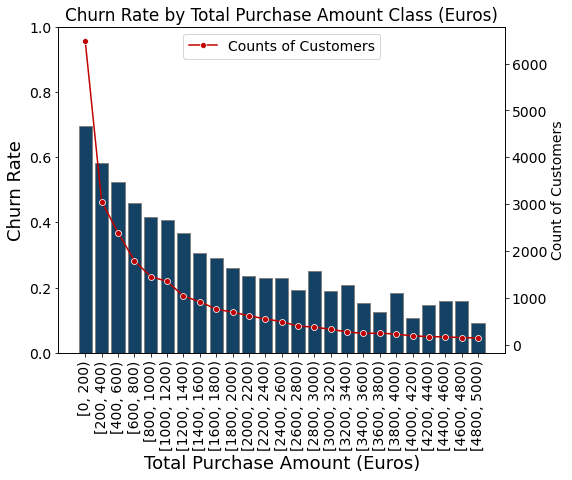

In [49]:
# Filter the dataframe
df_total_purchase_amount = df_churn_subset[(df_churn_subset['total_purchase_amount'] <= 5000) & (df_churn_subset['total_purchase_amount'] > 0)].copy()

df_total_purchase_amount['total_purchase_amount_class'] = pd.cut(df_total_purchase_amount['total_purchase_amount'], bins=range(0, df_total_purchase_amount['total_purchase_amount'].astype('int').max() + 200, 200), right=False)


df_total_purchase_amount_grouped = df_total_purchase_amount.groupby('total_purchase_amount_class').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='total_purchase_amount_class', y='churn_rate', data=df_total_purchase_amount_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Total Purchase Amount (Euros)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Total Purchase Amount Class (Euros)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_total_purchase_amount_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

#### 1.6. relationship between returns frequency in the previous year and churn

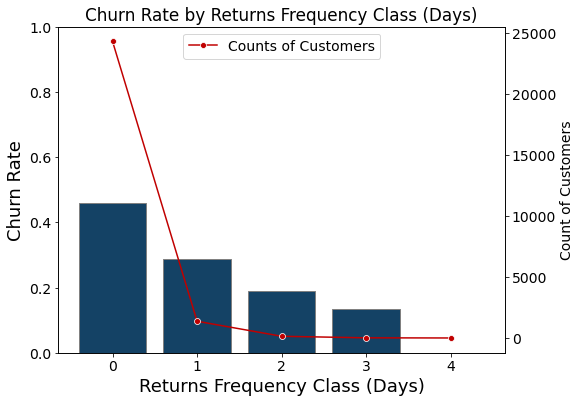

In [50]:
# Filter the dataframe
df_returns_frequency = df_churn_subset[df_churn_subset['returns_frequency_1_yr'] <= 10].copy()


df_returns_frequency_grouped = df_returns_frequency.groupby('returns_frequency_1_yr').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='returns_frequency_1_yr', y='churn_rate', data=df_returns_frequency_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Returns Frequency Class (Days)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Returns Frequency Class (Days)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_returns_frequency_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

#### 1.7. relationship between returned amount in the previous year and churn

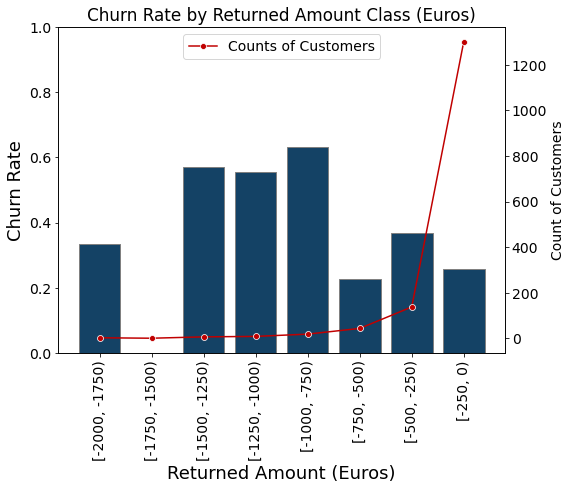

In [52]:
df_returned_amount = df_churn_subset[df_churn_subset['returned_amount_1_yr'] >= -2000].copy()

df_returned_amount['returned_amount_class'] = pd.cut(df_returned_amount['returned_amount_1_yr'], bins=range(-2000, df_returned_amount['returned_amount_1_yr'].astype('int').max() + 250, 250), right=False)


df_returned_amount_grouped = df_returned_amount.groupby('returned_amount_class').\
    agg(churn_rate = ('is_churn','mean'),
        count_customers=('is_churn', 'size')).\
        reset_index()#.\
        #melt(id_vars='recency_class')

# Create a seaborn bar plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the average customer value
sns.barplot(x='returned_amount_class', y='churn_rate', data=df_returned_amount_grouped, color=PALLETTE['blue'], edgecolor='grey', ax=ax1)
ax1.set_xlabel('Returned Amount (Euros)', fontsize=FONT_SIZE_2)
ax1.set_ylabel('Churn Rate', fontsize=FONT_SIZE_2)
ax1.set_ylim(0, 1)
ax1.set_title('Churn Rate by Returned Amount Class (Euros)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a second y-axis to plot the counts
ax2 = ax1.twinx()

sns.lineplot(data=df_returned_amount_grouped.count_customers, color=PALLETTE['red'], ax=ax2, marker='o')
ax2.set_ylabel('Count of Customers')

plt.legend(['Counts of Customers'], loc='upper center')

plt.show()

### 2. Pairplot for all numeric variables in the dataset

In [63]:
numeric_columns = ['recency', 
                   'purchase_frequency_1_yr', 
                   'tenure',
                   'purchase_amount_1_yr', 
                   'is_churn']

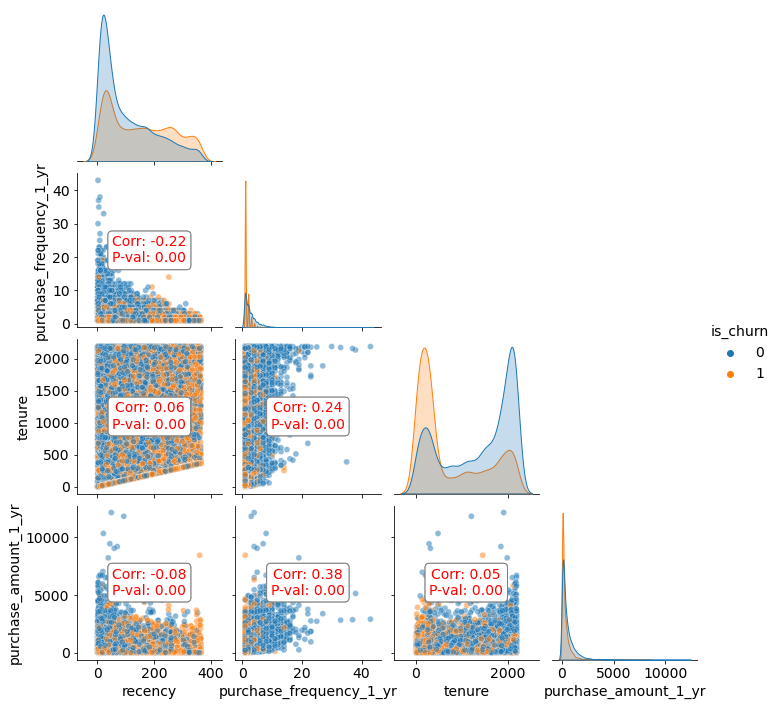

In [ ]:
# Function to annotate correlation coefficients with a white box and grey border
def annotate_corr_coeff_and_pvalue(x, y, **kwargs):
    corr, p_value = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        f'Corr: {corr:.2f}\nP-val: {p_value:.2f}', 
        xy=(0.5, 0.5), 
        xycoords=ax.transAxes, 
        ha='center', 
        va='center', 
        fontsize=FONT_SIZE, 
        color='red', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='grey',
        facecolor='white')
    )

# Create the pairplot with correlation coefficients
pairplot = sns.pairplot(df_churn_subset[numeric_columns], hue='is_churn', diag_kind='kde', plot_kws={'alpha': 0.5}, corner=True) # Use the custom color palette
pairplot.map_lower(annotate_corr_coeff_and_pvalue)

plt.show()

### 3. Check the relationship for all analysis dates in the dataset

In [68]:
df_churn_dataset.analysis_date.unique()

array(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
       '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
       '2023-01-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01'], dtype=object)

#### 3.1. Recency

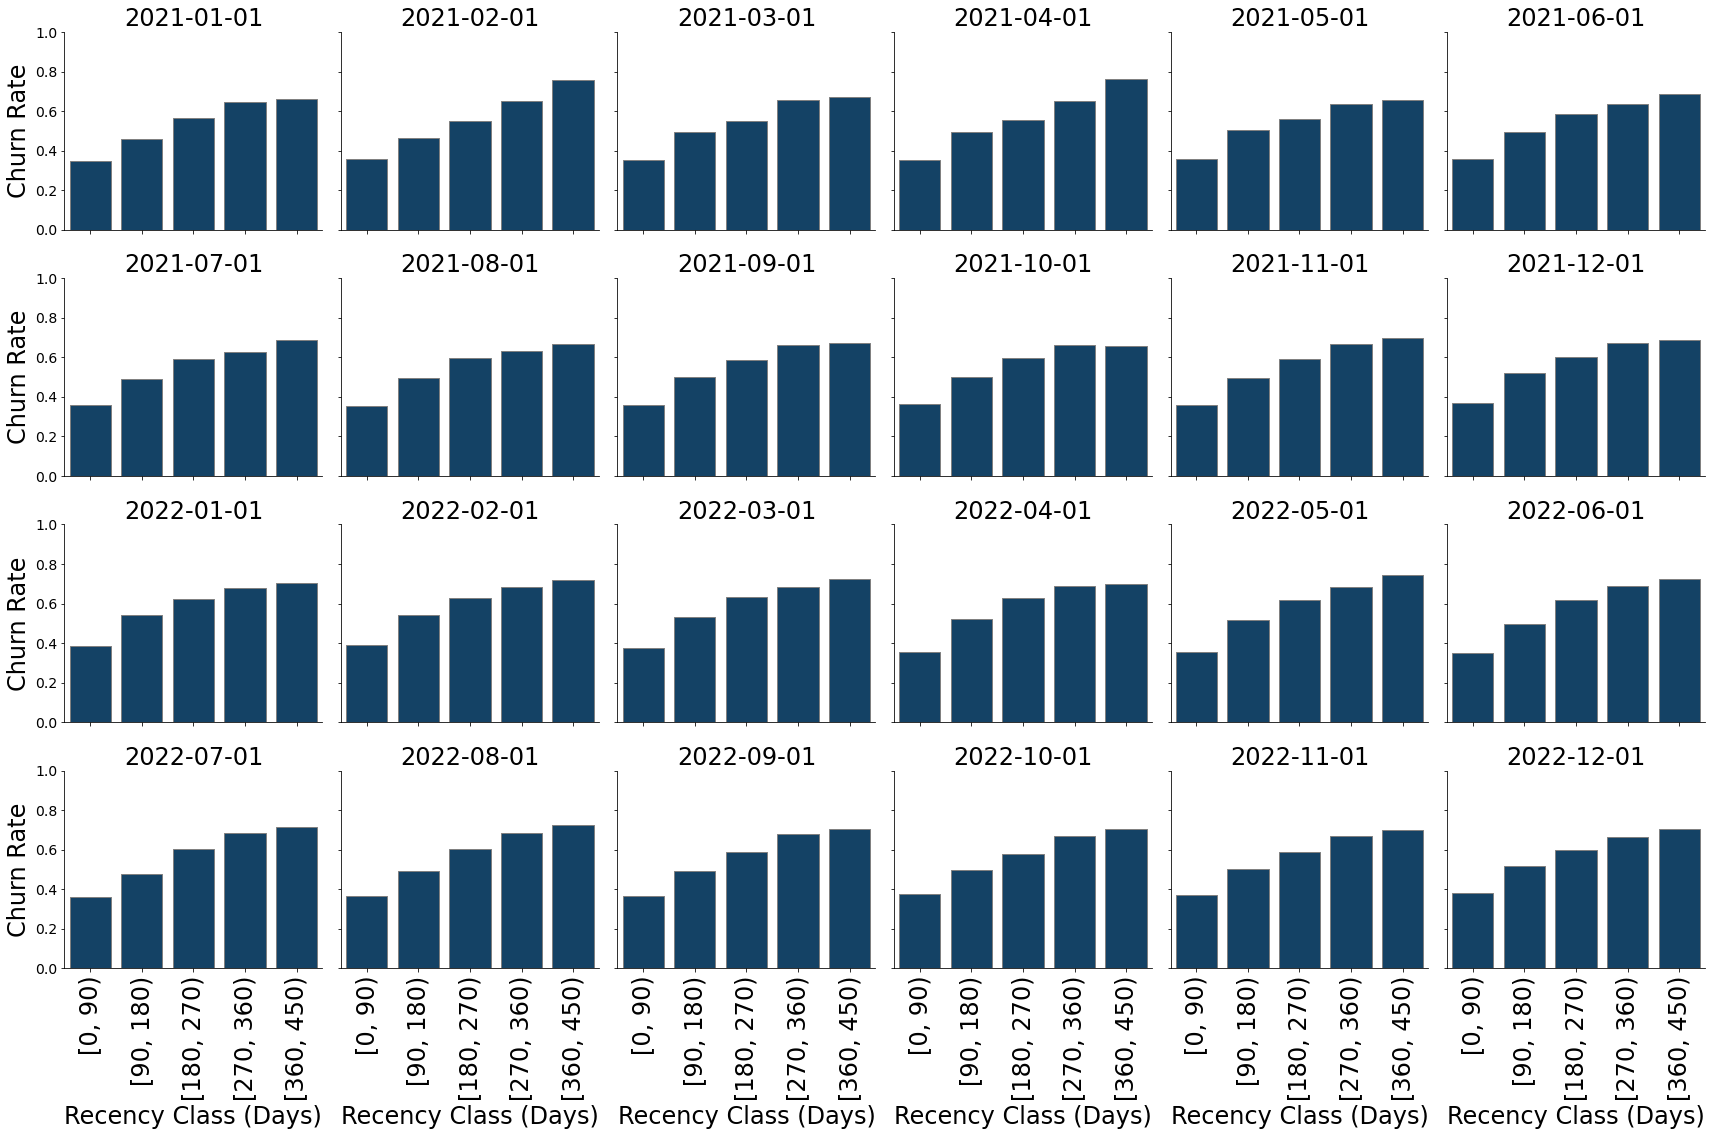

In [82]:
df_recency_full = df_churn_dataset[df_churn_dataset['analysis_date'] != '2023-01-01'].copy()

# Define the bin edges for intervals of 200
bin_edges = np.arange(0, df_recency_full['recency'].max() + 90, 90)

# Create a new column with the bucketed values
df_recency_full['recency_class'] = pd.cut(df_recency_full['recency'], bins=bin_edges, right=False)

df_recency_full_grouped = df_recency_full.\
    groupby(['analysis_date','recency_class']).\
        agg(churn_rate=('is_churn', 'mean')).\
            reset_index()

# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(df_recency_full_grouped, col="analysis_date", col_wrap=6, height=4, sharey=True, ylim=(0, 1))

# Map a barplot to the grid
g.map(sns.barplot, "recency_class", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Recency Class (Days)", "Churn Rate", fontsize=FONT_SIZE_3)
g.set_titles("{col_name}", size=FONT_SIZE_3)
g.set_xticklabels(rotation=90, size=FONT_SIZE_3)


# Adjust layout
g.tight_layout()
plt.show()

#### 3.2. Purchase frequency, 1 year

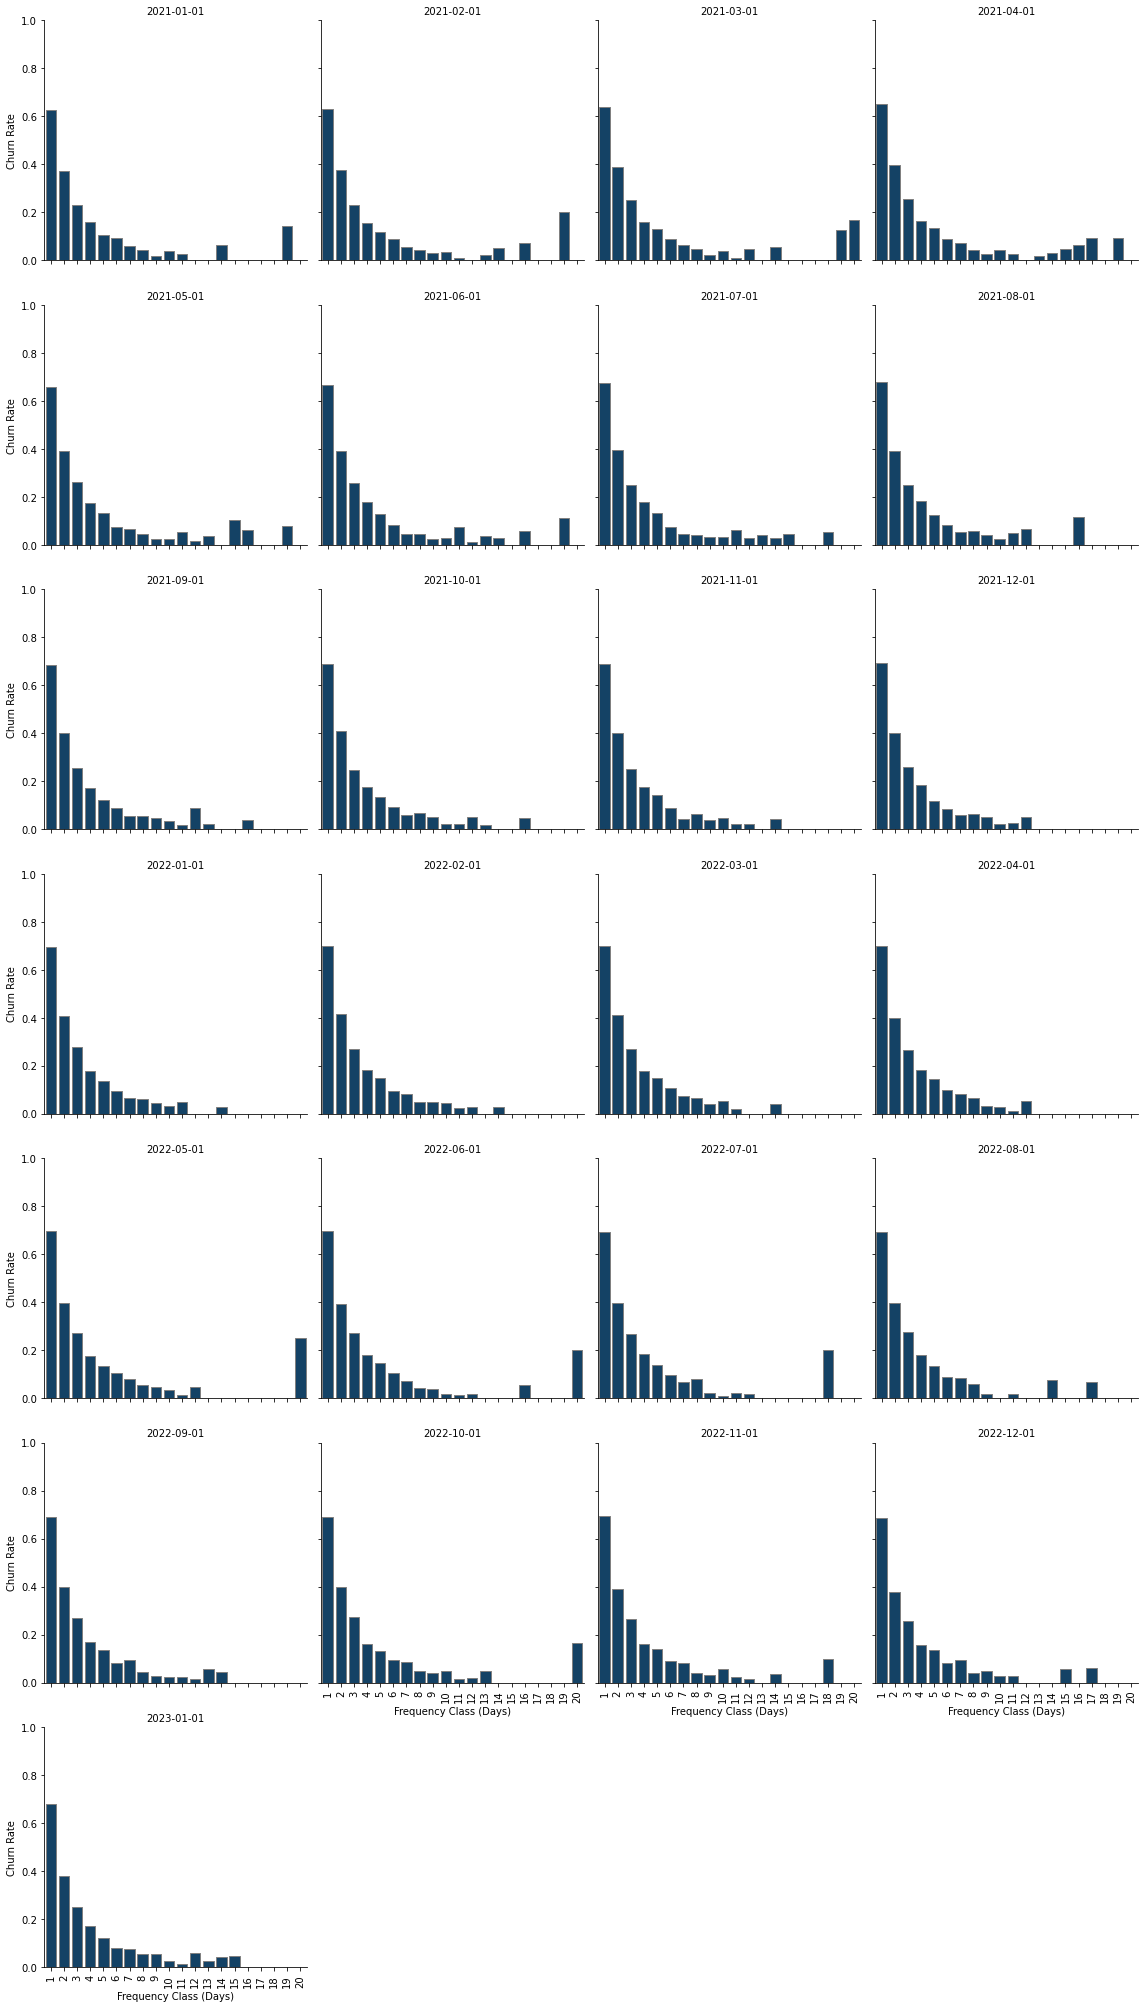

In [23]:
df_frequency_full = df_churn_dataset[df_churn_dataset['purchase_frequency_1_yr'] <= 20].copy()

df_frequency_full_grouped = df_frequency_full.groupby(['analysis_date','purchase_frequency_1_yr']).\
    agg(churn_rate = ('is_churn','mean')).\
        reset_index()


# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(df_frequency_full_grouped, col="analysis_date", col_wrap=4, height=4, sharey=True, ylim=(0, 1))

# Map a barplot to the grid
g.map(sns.barplot, "purchase_frequency_1_yr", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Frequency Class (Days)", "Churn Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

# Adjust layout
g.tight_layout()
plt.show()

#### 3.3. relationship between purchase amount in the previous year and churn, all analysis dates

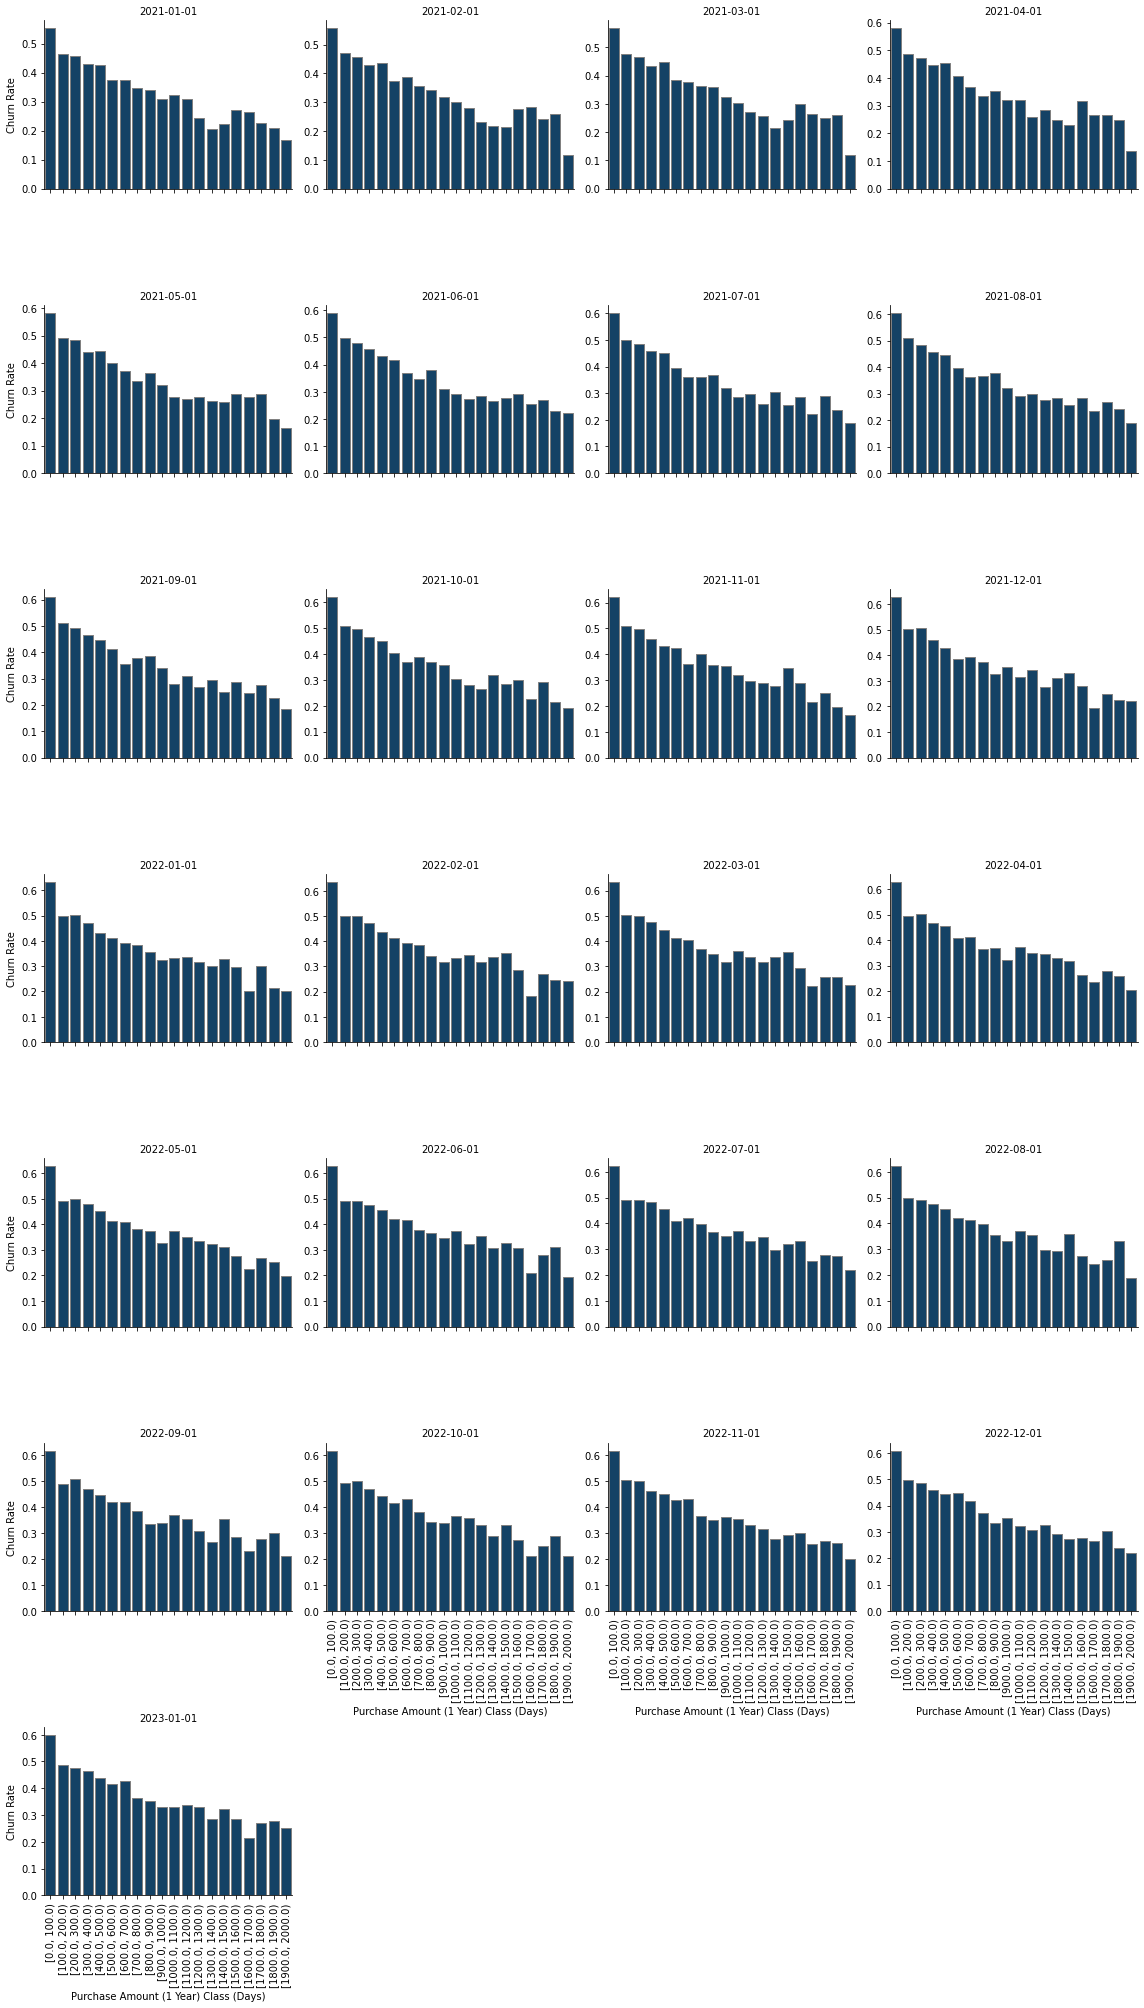

In [24]:
df_purchase_amount_1_yr_full = df_churn_dataset[df_churn_dataset['purchase_amount_1_yr'] <= 2000].copy()

# Define the bin edges for intervals of 200
bin_edges = np.arange(0, df_purchase_amount_1_yr_full['purchase_amount_1_yr'].max() + 100, 100)

# Create a new column with the bucketed values
df_purchase_amount_1_yr_full['purchase_amount_1_yr_class'] = pd.cut(df_purchase_amount_1_yr_full['purchase_amount_1_yr'], bins=bin_edges, right=False)

df_purchase_amount_1_yr_full_grouped = df_purchase_amount_1_yr_full.\
    groupby(['analysis_date','purchase_amount_1_yr_class']).\
        agg(churn_rate=('is_churn', 'mean')).\
            reset_index()

# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(df_purchase_amount_1_yr_full_grouped, col="analysis_date", col_wrap=4, height=4, sharey=True, ylim=(0, 1))

# Map a barplot to the grid
g.map(sns.barplot, "purchase_amount_1_yr_class", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Purchase Amount (1 Year) Class (Days)", "Churn Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

# Adjust layout
g.tight_layout()
plt.show()

#### 3.4. Relationship between tenure and churn, all analysis dates

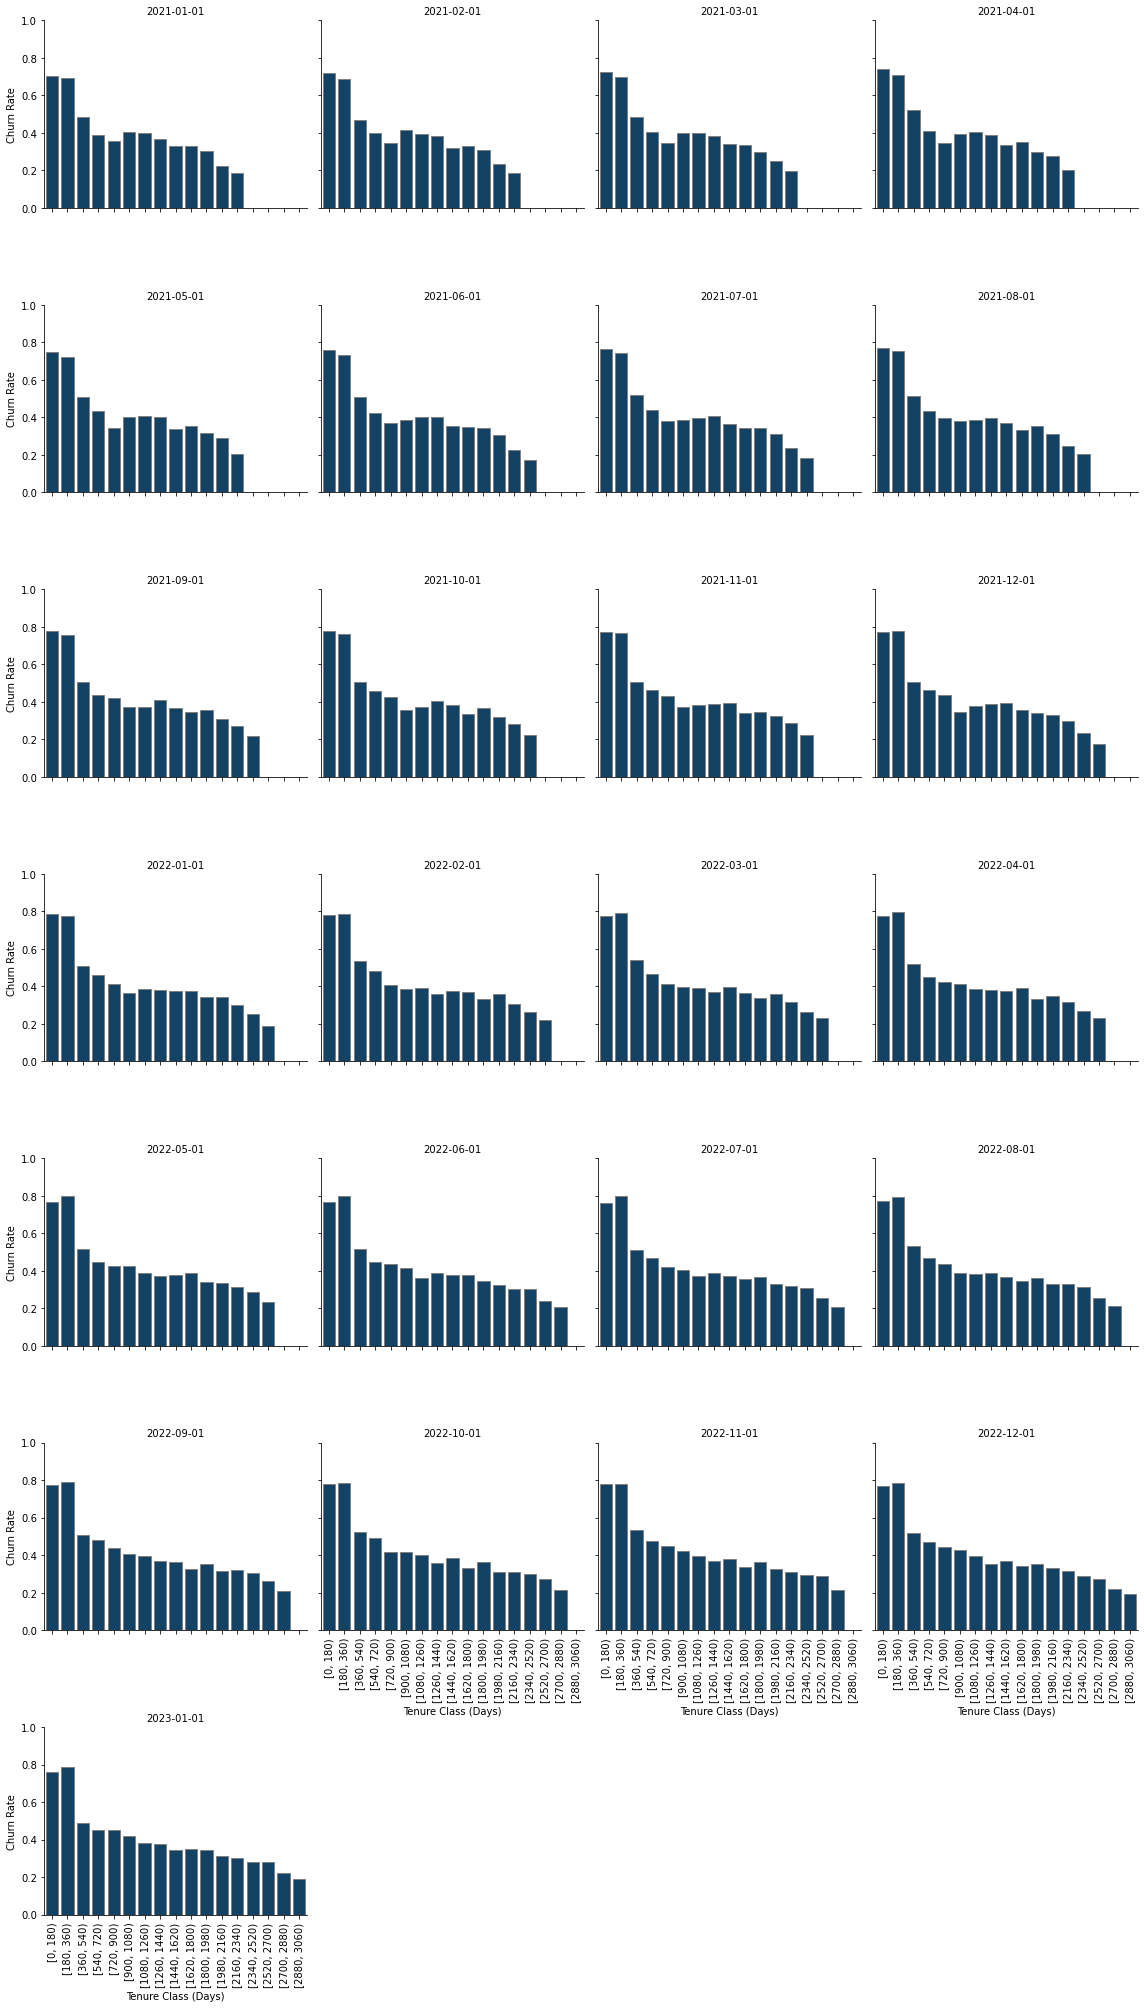

In [27]:
df_tenure_full = df_churn_dataset.copy()

# Define the bin edges for intervals of 200
bin_edges = np.arange(0, df_tenure_full['tenure'].max() + 180, 180)

# Create a new column with the bucketed values
df_tenure_full['tenure_class'] = pd.cut(df_tenure_full['tenure'], bins=bin_edges, right=False)

ddf_tenure_full_grouped = df_tenure_full.\
    groupby(['analysis_date','tenure_class']).\
        agg(churn_rate=('is_churn', 'mean')).\
            reset_index()

# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(ddf_tenure_full_grouped, col="analysis_date", col_wrap=4, height=4, sharey=True, ylim=(0, 1))

# Map a barplot to the grid
g.map(sns.barplot, "tenure_class", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Tenure Class (Days)", "Churn Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

# Adjust layout
g.tight_layout()
plt.show()

#### 3.5. Relationship between total purchase amount and churn, all analysis dates

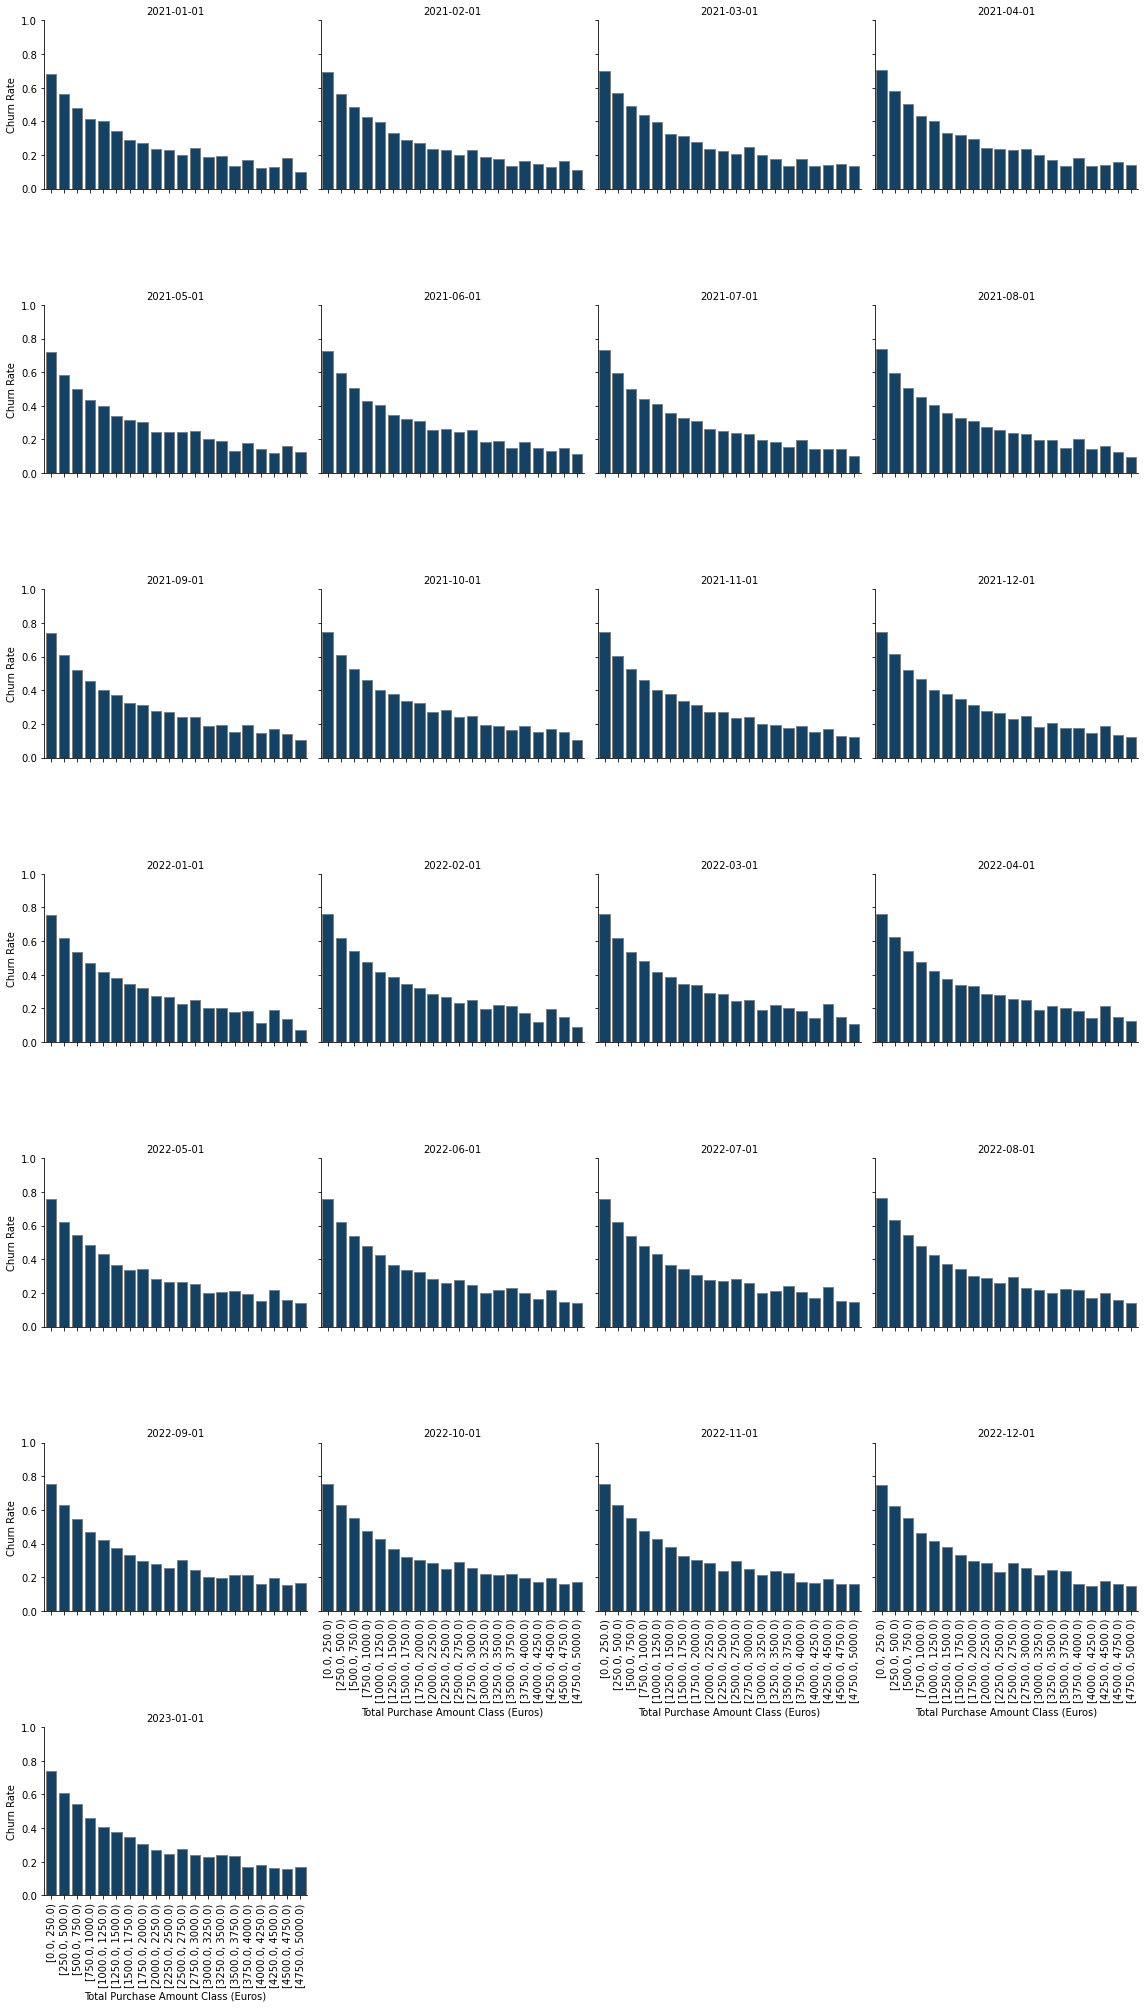

In [32]:
df_total_purchase_amount_full = df_churn_dataset[(df_churn_dataset['total_purchase_amount'] <= 5000) & (df_churn_dataset['total_purchase_amount'] > 0)].copy()

# Define the bin edges for intervals of 200
bin_edges = np.arange(0, df_total_purchase_amount_full['total_purchase_amount'].max() + 250, 250)

# Create a new column with the bucketed values
df_total_purchase_amount_full['total_purchase_amount_class'] = pd.cut(df_total_purchase_amount_full['total_purchase_amount'], bins=bin_edges, right=False)

df_total_purchase_amount_full_grouped = df_total_purchase_amount_full.\
    groupby(['analysis_date','total_purchase_amount_class']).\
        agg(churn_rate=('is_churn', 'mean')).\
            reset_index()

# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(df_total_purchase_amount_full_grouped, col="analysis_date", col_wrap=4, height=4, sharey=True, ylim=(0, 1))

# Map a barplot to the grid
g.map(sns.barplot, "total_purchase_amount_class", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Total Purchase Amount Class (Euros)", "Churn Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

# Adjust layout
g.tight_layout()
plt.show()

#### 3.6. relationship between returns frequency and churn, all analysis dates

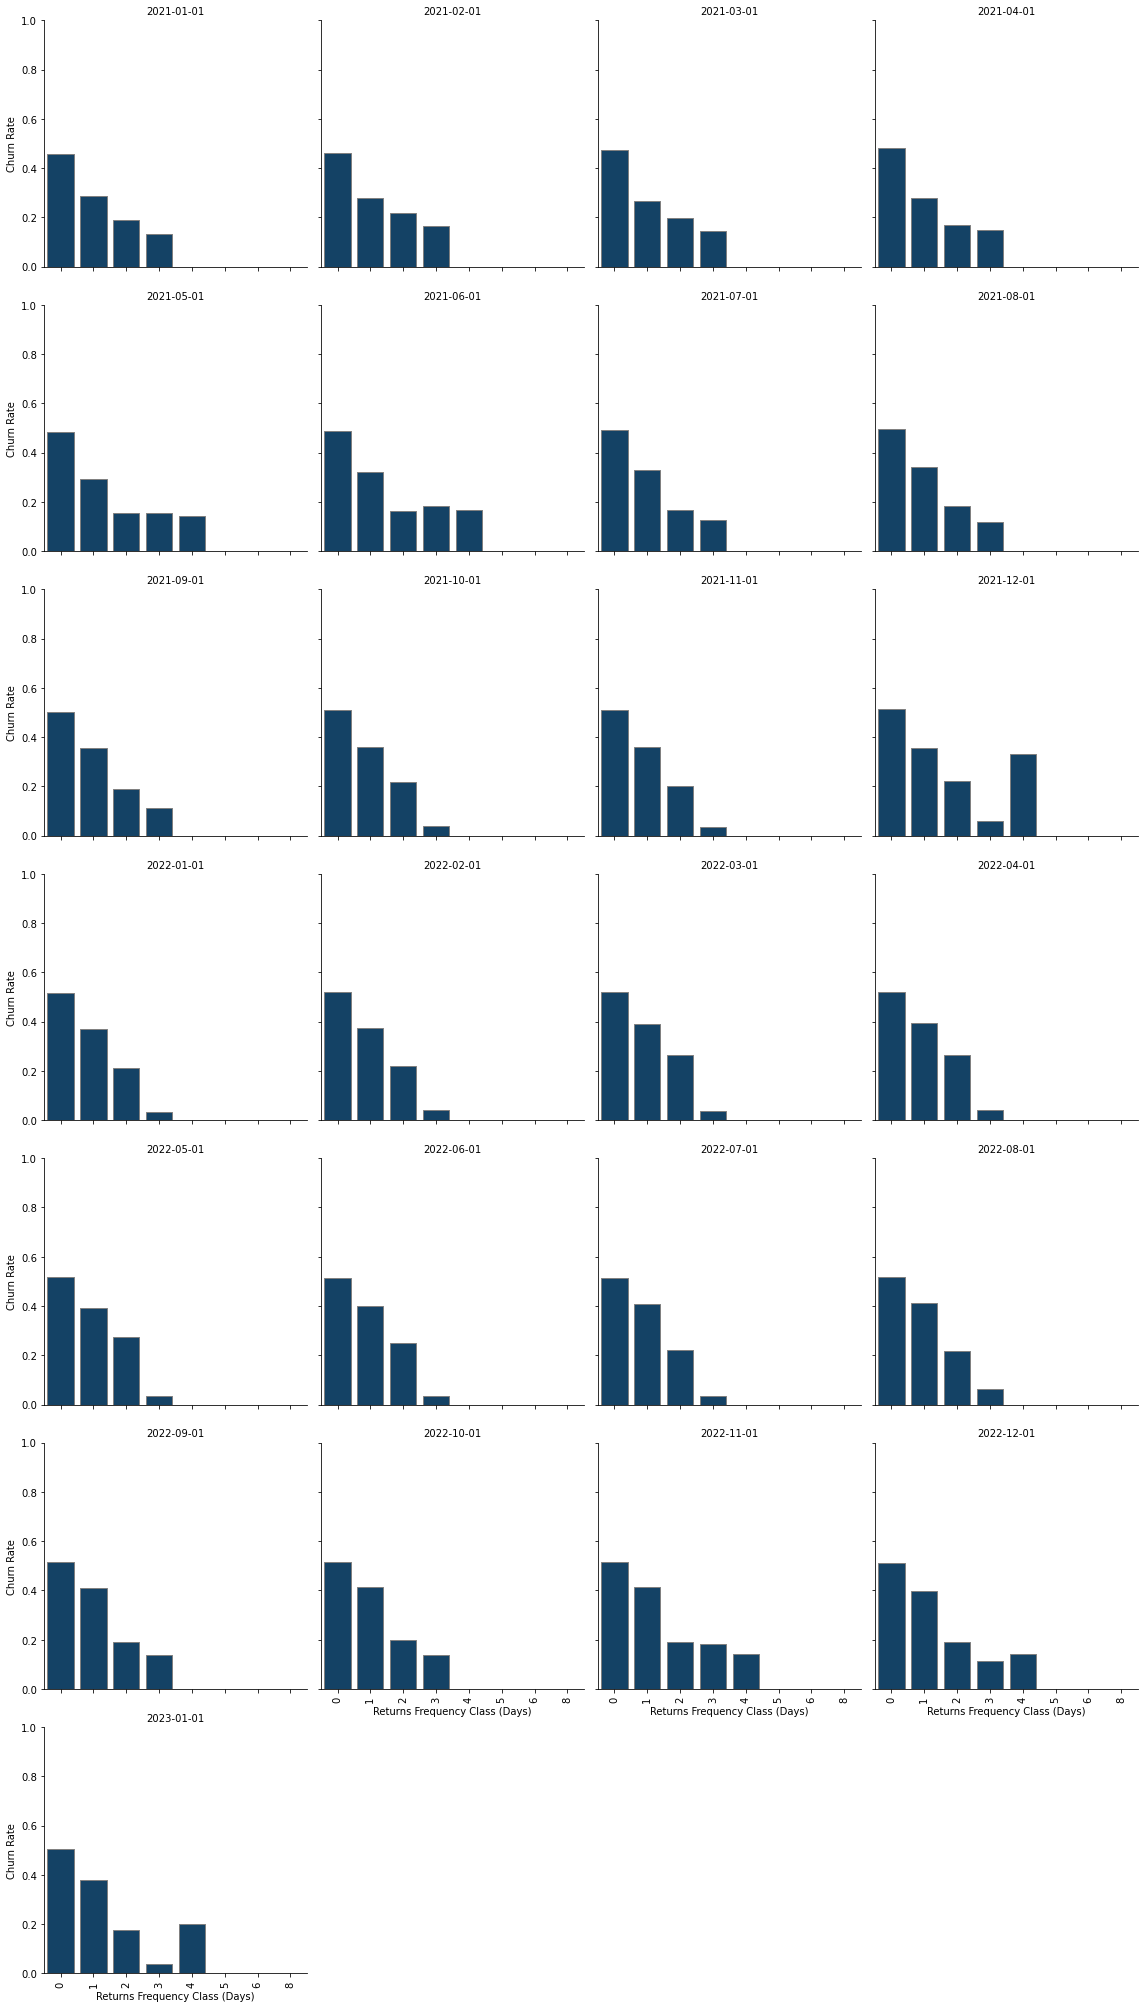

In [29]:
df_returns_frequency_full = df_churn_dataset[df_churn_dataset['returns_frequency_1_yr'] <= 10].copy()

#df_recency_full['recency_class'] = df_recency_full.groupby('analysis_date').apply(lambda x: pd.cut(x['recency'], bins=range(0, df_recency_full['recency'].max() + 180, 180), right=False)).reset_index(drop = True)

df_returns_frequency_full_grouped = df_returns_frequency_full.groupby(['analysis_date','returns_frequency_1_yr']).\
    agg(churn_rate = ('is_churn','mean')).\
        reset_index()


# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(df_returns_frequency_full_grouped, col="analysis_date", col_wrap=4, height=4, sharey=True, ylim=(0, 1))

# Map a barplot to the grid
g.map(sns.barplot, "returns_frequency_1_yr", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Returns Frequency Class (Days)", "Churn Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

# Adjust layout
g.tight_layout()
plt.show()

#### 3.7. relationship between returned amount and churn, all analysis dates

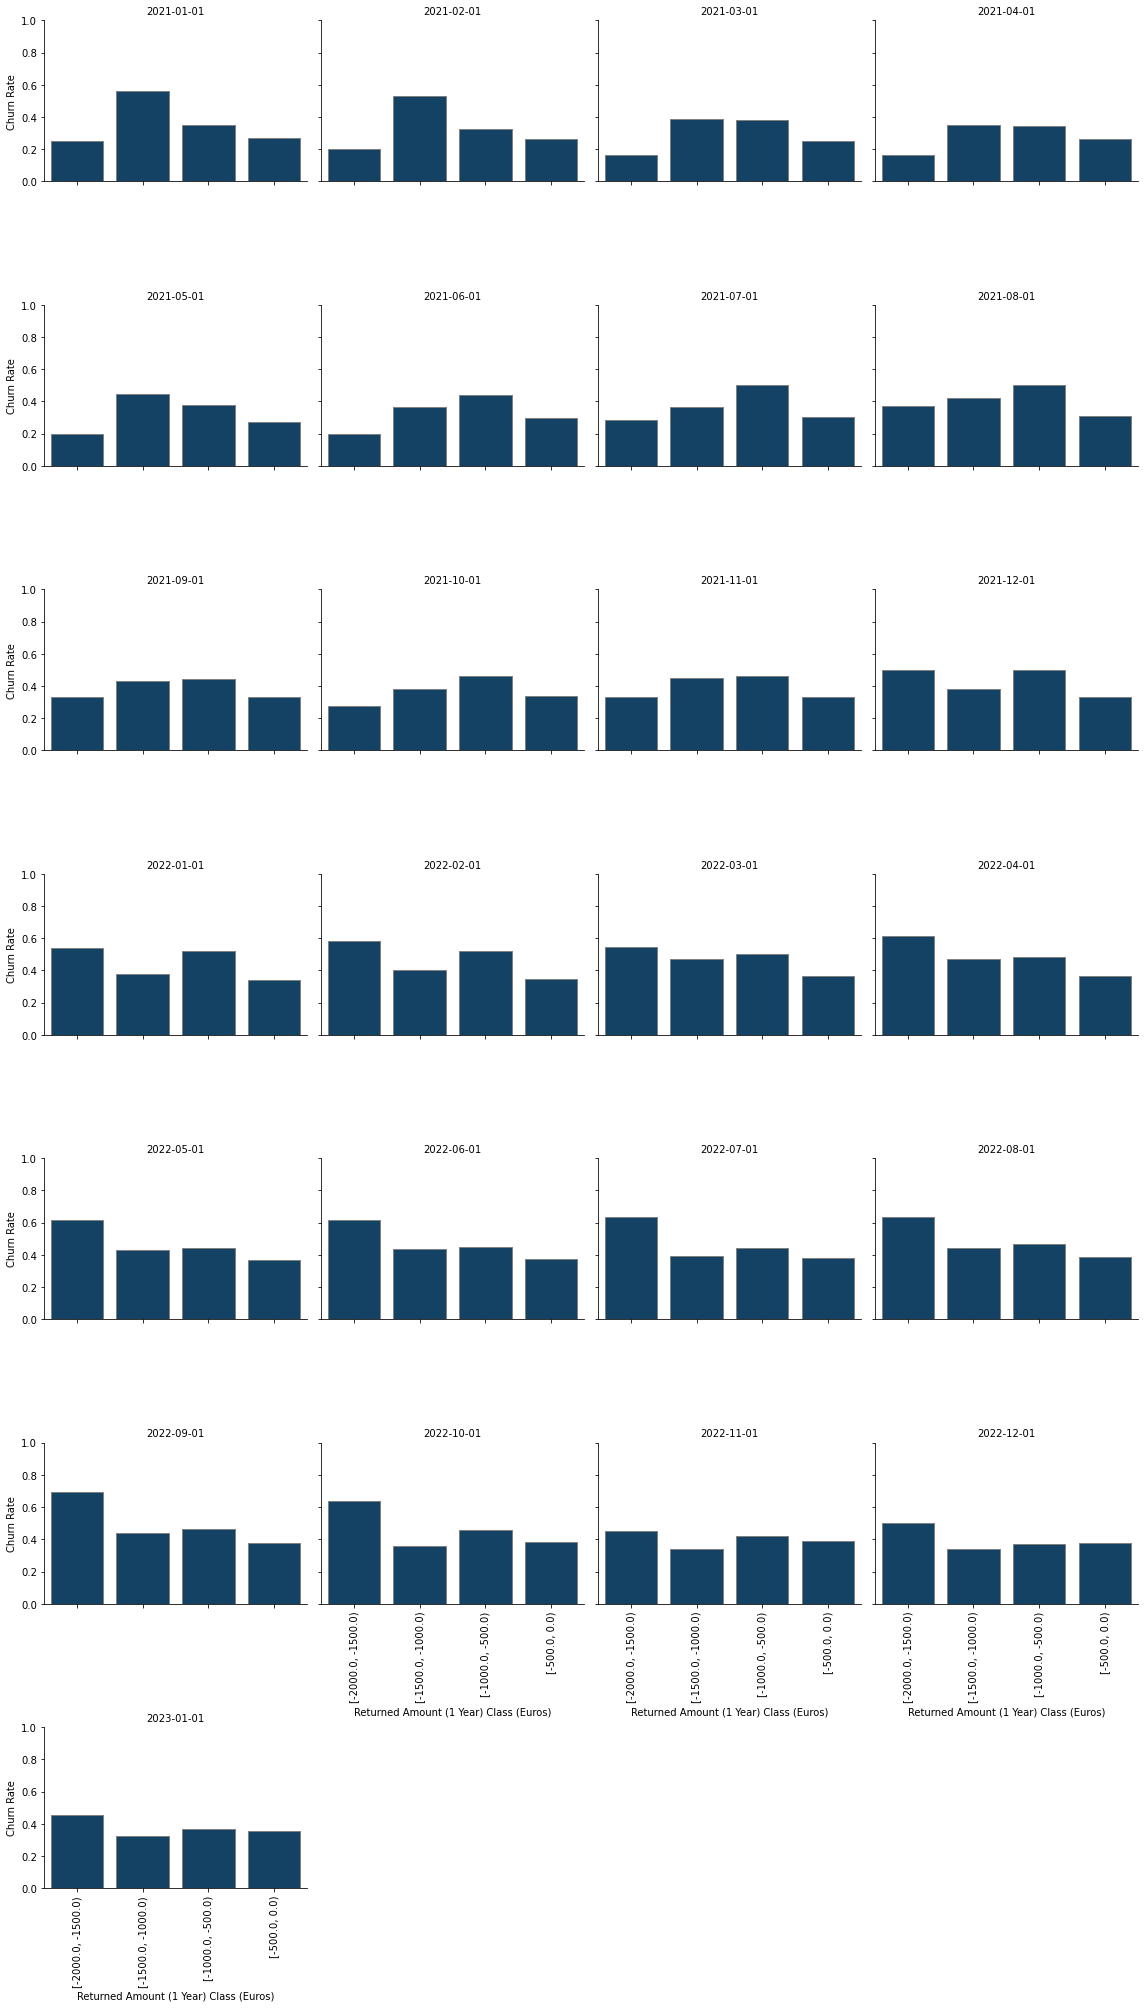

In [30]:
df_returned_amount_1_yr_full = df_churn_dataset[(df_churn_dataset['returned_amount_1_yr'] >= -2000)].copy()

# Define the bin edges for intervals of 200
bin_edges = np.arange(-2000, df_returned_amount_1_yr_full['returned_amount_1_yr'].max() + 500, 500)

# Create a new column with the bucketed values
df_returned_amount_1_yr_full['returned_amount_1_yr_class'] = pd.cut(df_returned_amount_1_yr_full['returned_amount_1_yr'], bins=bin_edges, right=False)

df_returned_amount_1_yr_full_grouped = df_returned_amount_1_yr_full.\
    groupby(['analysis_date','returned_amount_1_yr_class']).\
        agg(churn_rate=('is_churn', 'mean')).\
            reset_index()

# Create a FacetGrid to facet by analysis_date
g = sns.FacetGrid(df_returned_amount_1_yr_full_grouped, col="analysis_date", col_wrap=4, height=4, sharey=True, ylim=(0, 1))
 
# Map a barplot to the grid
g.map(sns.barplot, "returned_amount_1_yr_class", "churn_rate", color=PALLETTE['blue'], edgecolor="grey")

# Set axis labels and titles
g.set_axis_labels("Returned Amount (1 Year) Class (Euros)", "Churn Rate")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

# Adjust layout
g.tight_layout()
plt.show()